In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.animation as ani
from matplotlib.pyplot import figure
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [15]:
df = pd.read_parquet('../data/processed_datasets/final_dataset_v3.parquet')

In [19]:
df['cases_by_pop'] = df.apply(lambda x: x['daily_cases']/x['POP2020'], axis=1)

In [21]:
df_mobility_selected = df.filter(['county','daily_cases','cases_by_pop','daily_deaths','date','retail_and_recreation_percent_change_from_baseline',
'grocery_and_pharmacy_percent_change_from_baseline',
'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline'], axis=1)

In [24]:
df_mobility_selected = df_mobility_selected.dropna()

In [27]:
df = df_mobility_selected
df.rename(columns={'county':'COUNTY'},inplace=True)

In [28]:
!pip3 install contextily
import contextily as cx

In [29]:
street_map = gpd.read_file('../data/raw_datasets/NYS_Civil_Boundaries.shp.zip',)

In [30]:
import matplotlib.colors as colors
import mapclassify
# import geoplot
%matplotlib inline


def plot_geo_data(df, col_name, ax, fig, title="", show_base_cbar=False, show_base_map=False):
    k = 1600  # I find that the more colors, the smoother the viz becomes as data points are spread across gradients
    #cmap = 'Blues'
    cmap = 'Blues'
    figsize = (20, 15)
    scheme = 'Quantiles'
    crs = {'init': 'epsg:4326'}

    subset = df.copy()
    subset['pop_density'] = subset['POP2020']/subset['CALC_SQ_MI']

    subset = subset.to_crs(crs)
    subset.plot(column=col_name, cmap=cmap, figsize=figsize, ax=ax,
                scheme=scheme, k=k, legend=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Adding Colorbar for legibility

    # normalize color
    vmin, vmax, vcenter = subset[col_name].min(
    ), subset[col_name].max(), subset[col_name].mean()
    divnorm = colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    # create a normalized colorbar
    if show_base_cbar:
        cbar = plt.cm.ScalarMappable(norm=divnorm, cmap=cmap)
        fig.colorbar(cbar, ax=ax)
    ax.set(title=title,
           ylabel="Lattitude", xlabel="Longitude")
    if show_base_map:
        cx.add_basemap(ax, crs=crs, source=cx.providers.Stamen.TonerLite)
# plt.show()


17th April 2020 - initial period
1st  August 2020 - second wave
25th January 2021 - Third wave & vaccine rollout (14th December)
9th July 2021 -  Spring/Summer 
23rd September 2021 - delta fourth wave
4th February 2022 - omicron fifth wave

**Mobility VS Cases for 17th April 2020 - initial period**

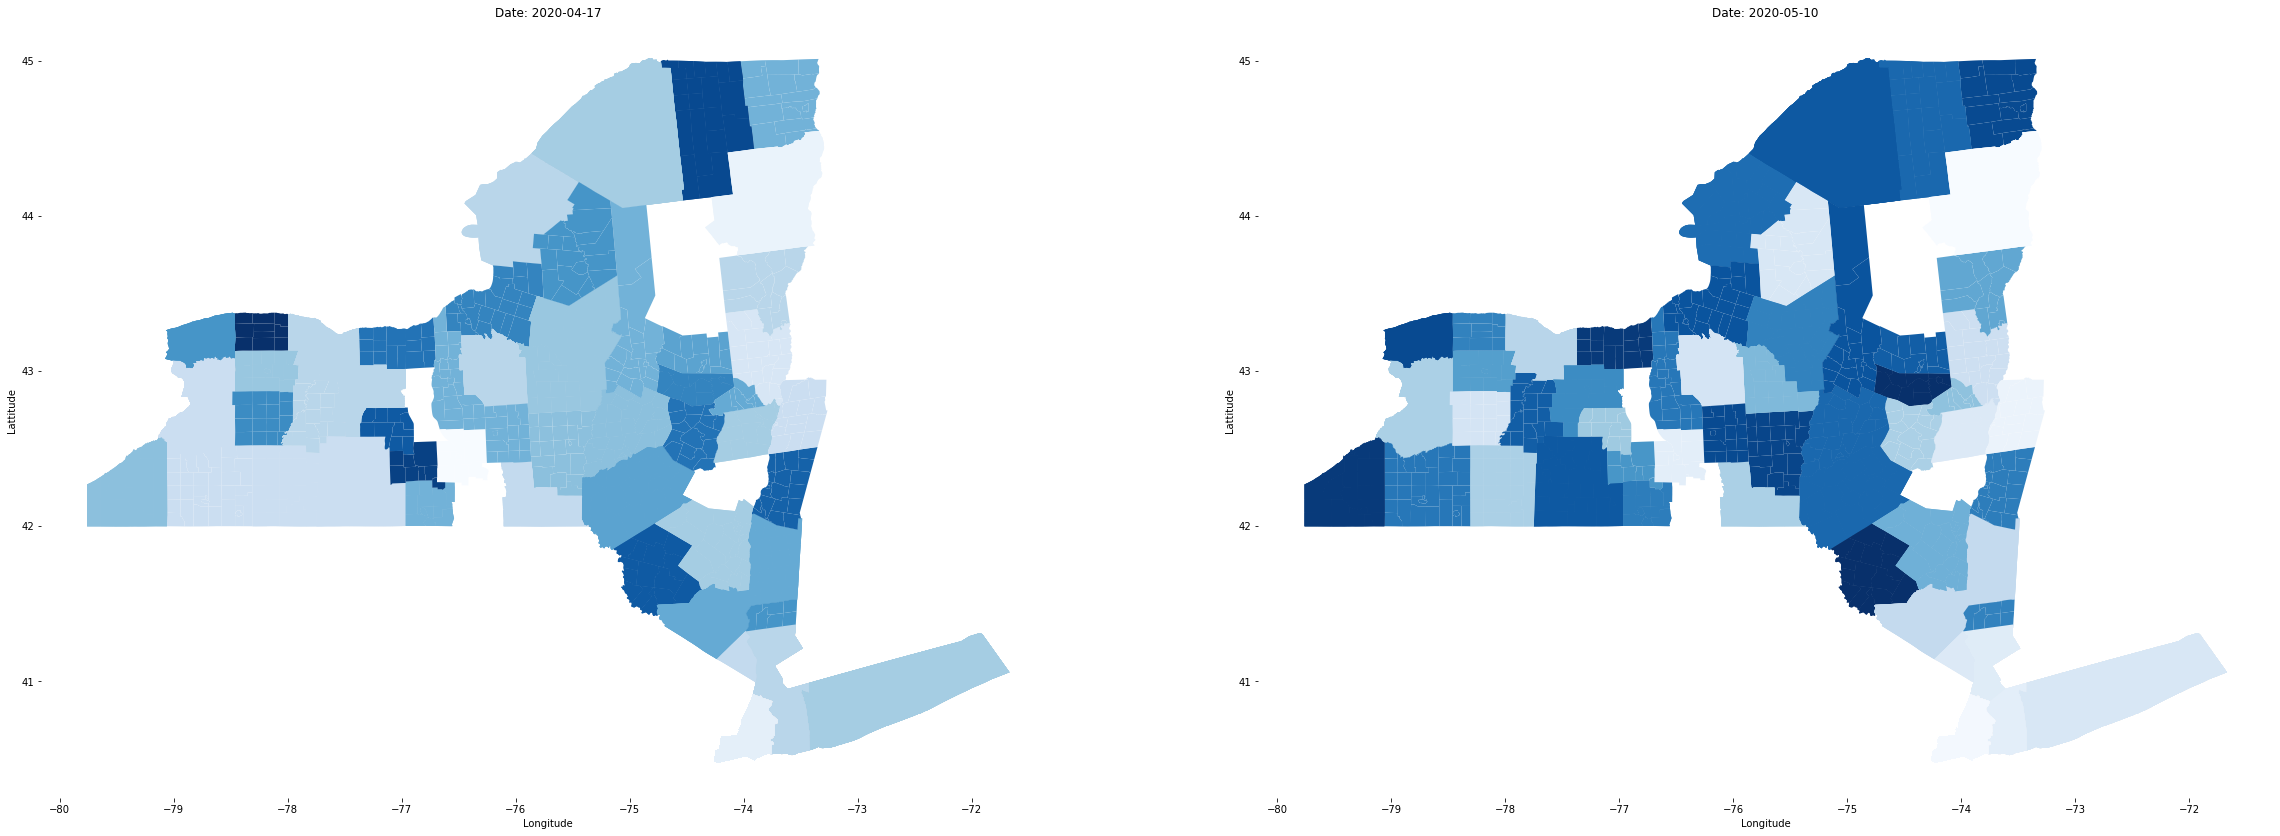

In [34]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-04-17',ax1),('2020-05-10',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'grocery_and_pharmacy_percent_change_from_baseline', ax=ax, fig=fig, title="Date: "+date)

**The above plot shows the mobility- This includes places like grocery markets,farmers markets, drug stores, and pharmacies.**

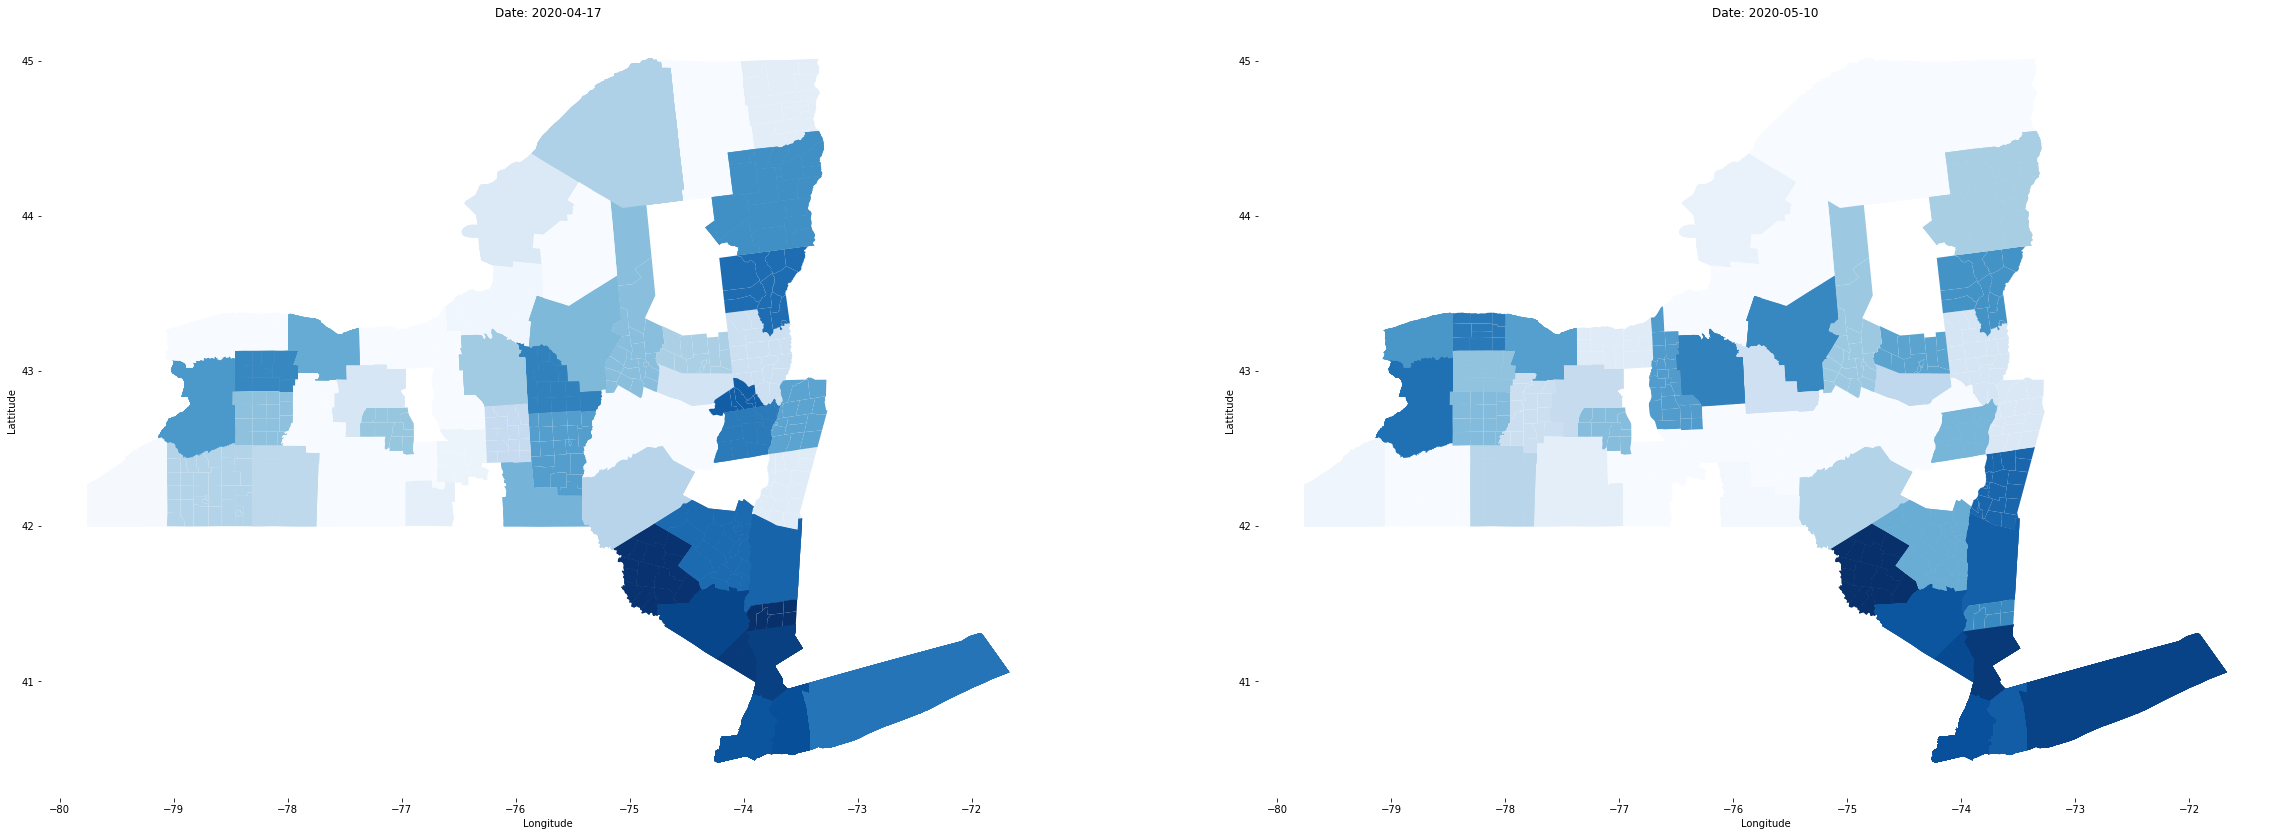

In [35]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)
for date,ax in [('2020-04-17',ax1),('2020-05-10',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'cases_by_pop', ax=ax, fig=fig, title="Date: "+date)

**The above plot shows daily covid cases on the particular day, the county where Covid cases are high, which is dark blue color has less mobility**

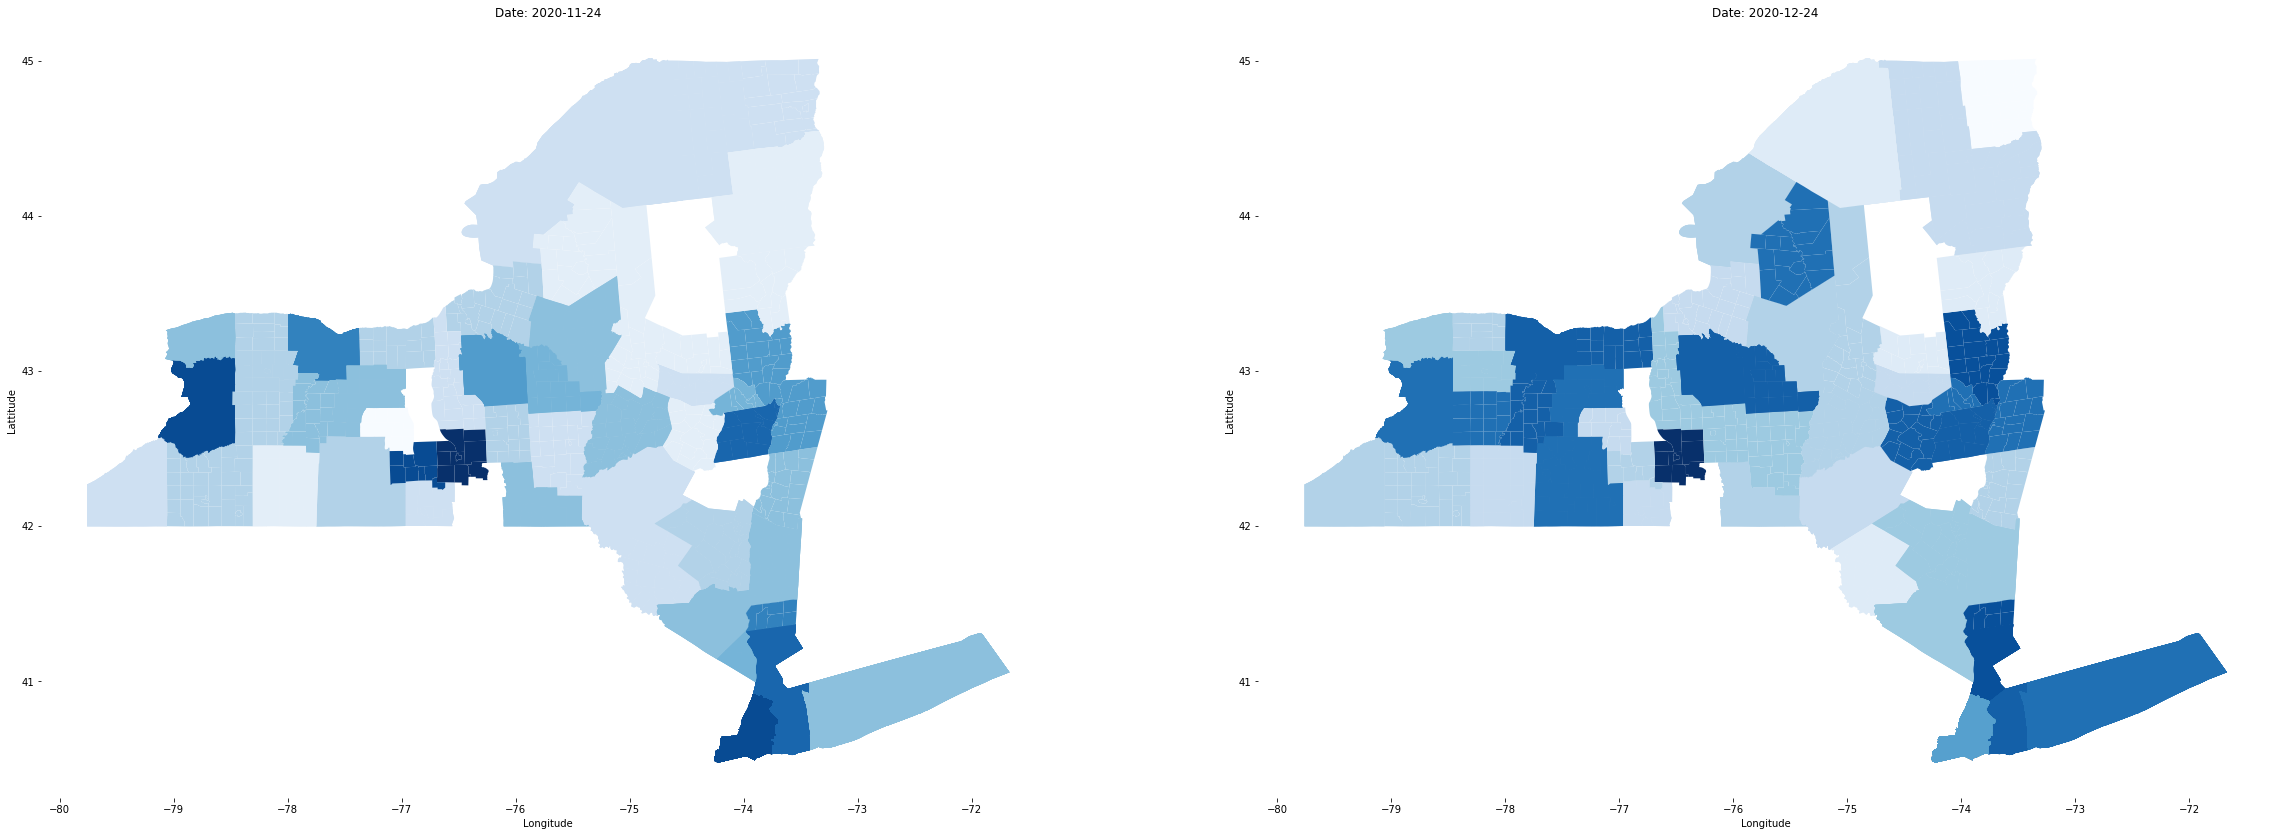

In [33]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-11-24',ax1),('2020-12-24',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'residential_percent_change_from_baseline', ax=ax, fig=fig, title="Date: "+date)

**The above plot shows the trend of people at home "time spent at home"**

**1st  August 2020 - second wave**

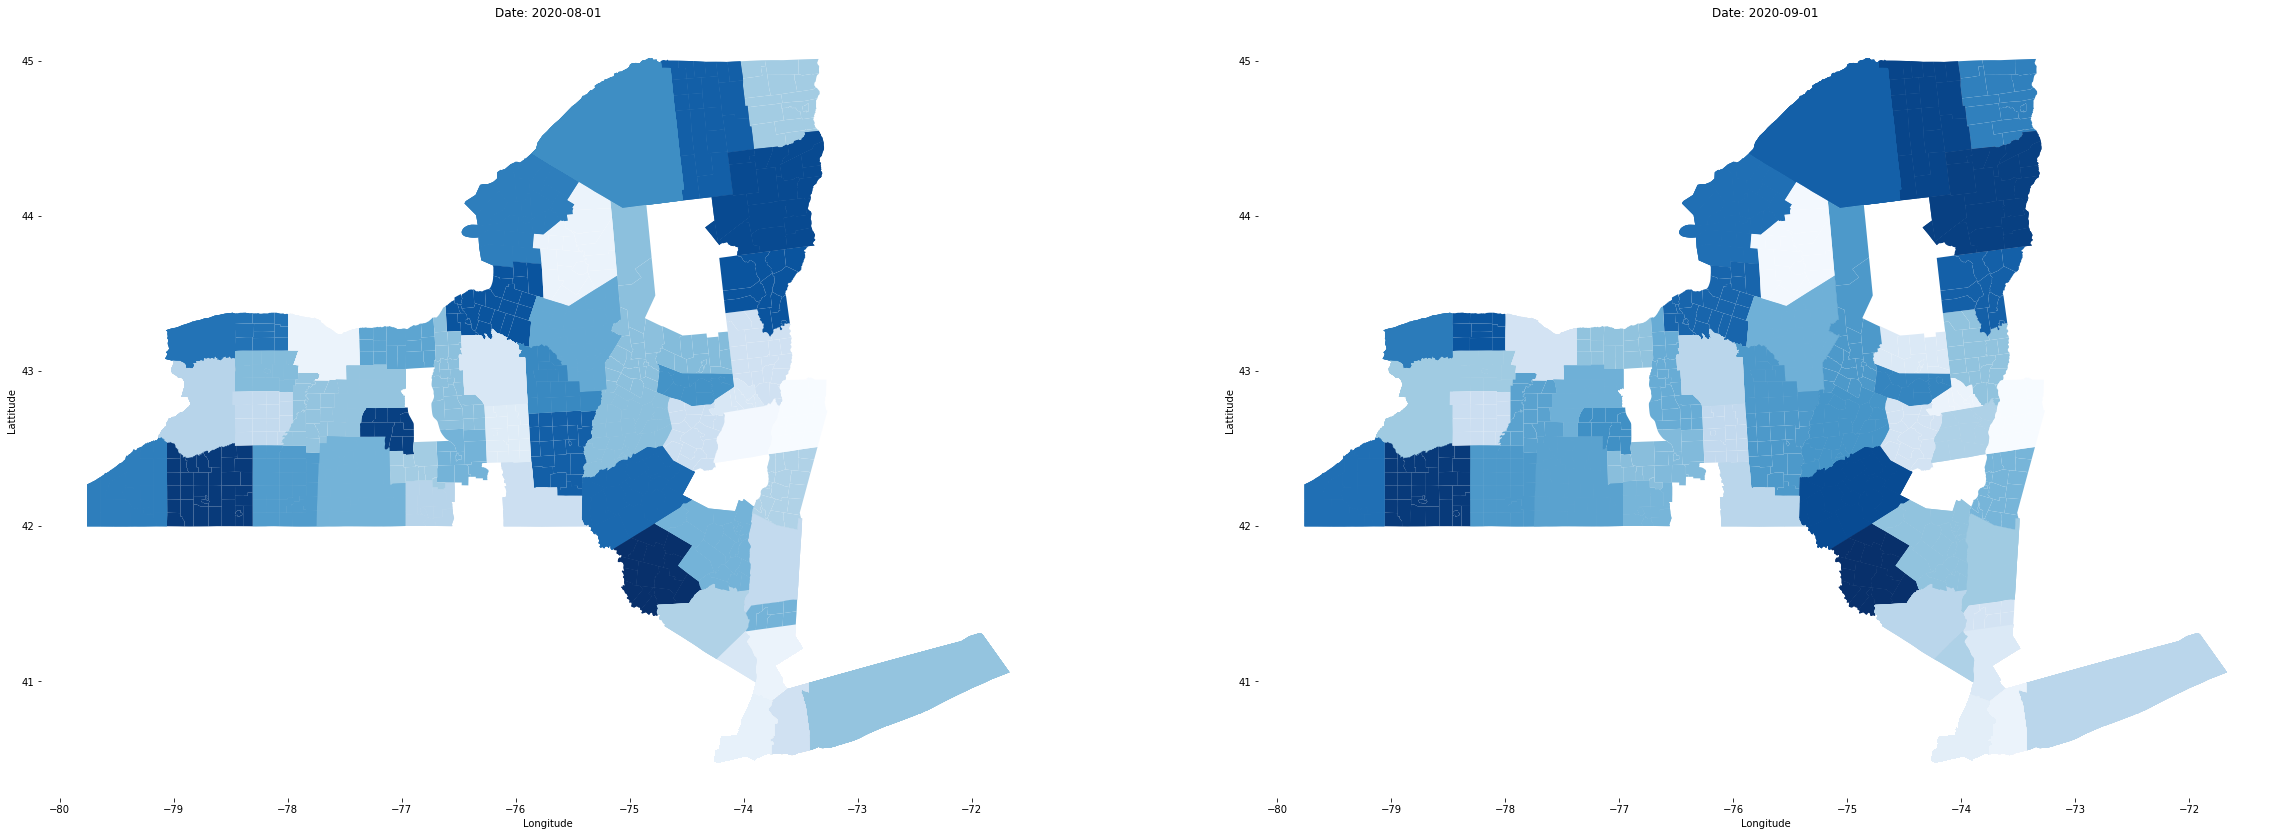

In [36]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2020-08-01',ax1),('2020-09-01',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'grocery_and_pharmacy_percent_change_from_baseline', ax=ax, fig=fig, title="Date: "+date)

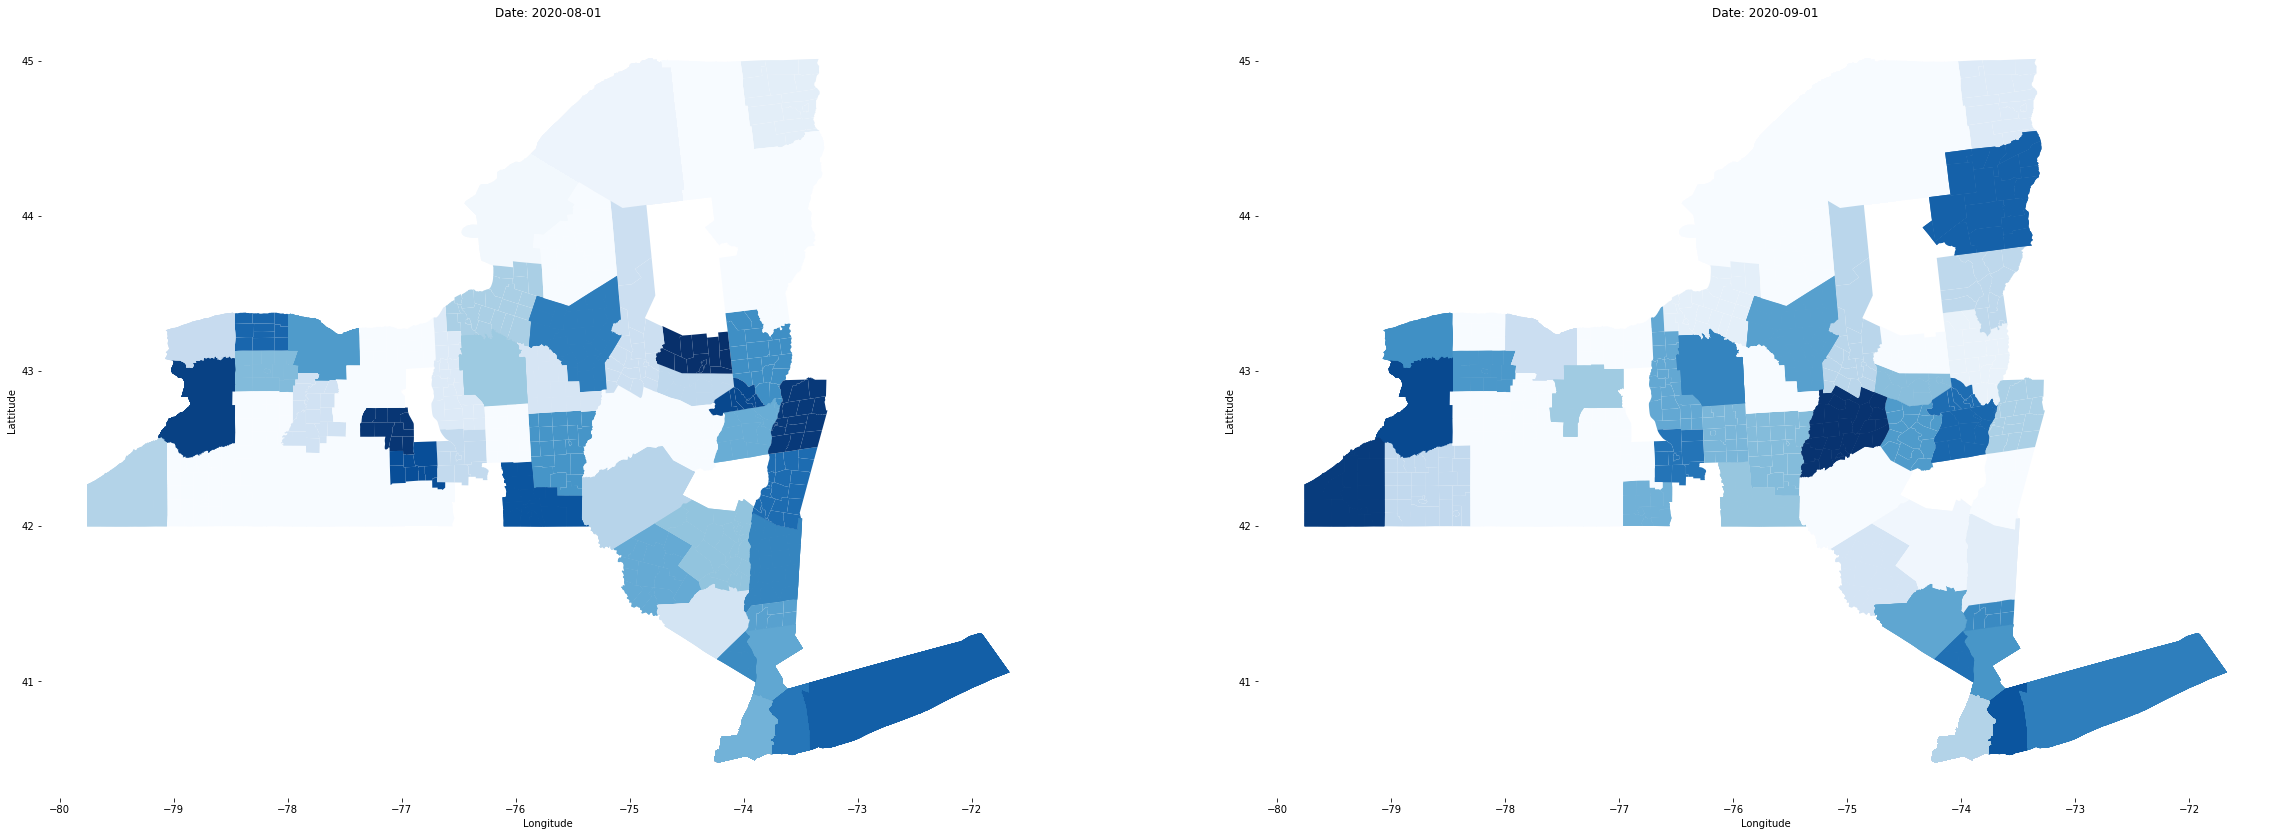

In [38]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)
for date,ax in [('2020-08-01',ax1),('2020-09-01',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'cases_by_pop', ax=ax, fig=fig, title="Date: "+date)

**25th January 2021 - Third wave & vaccine rollout (14th December)**

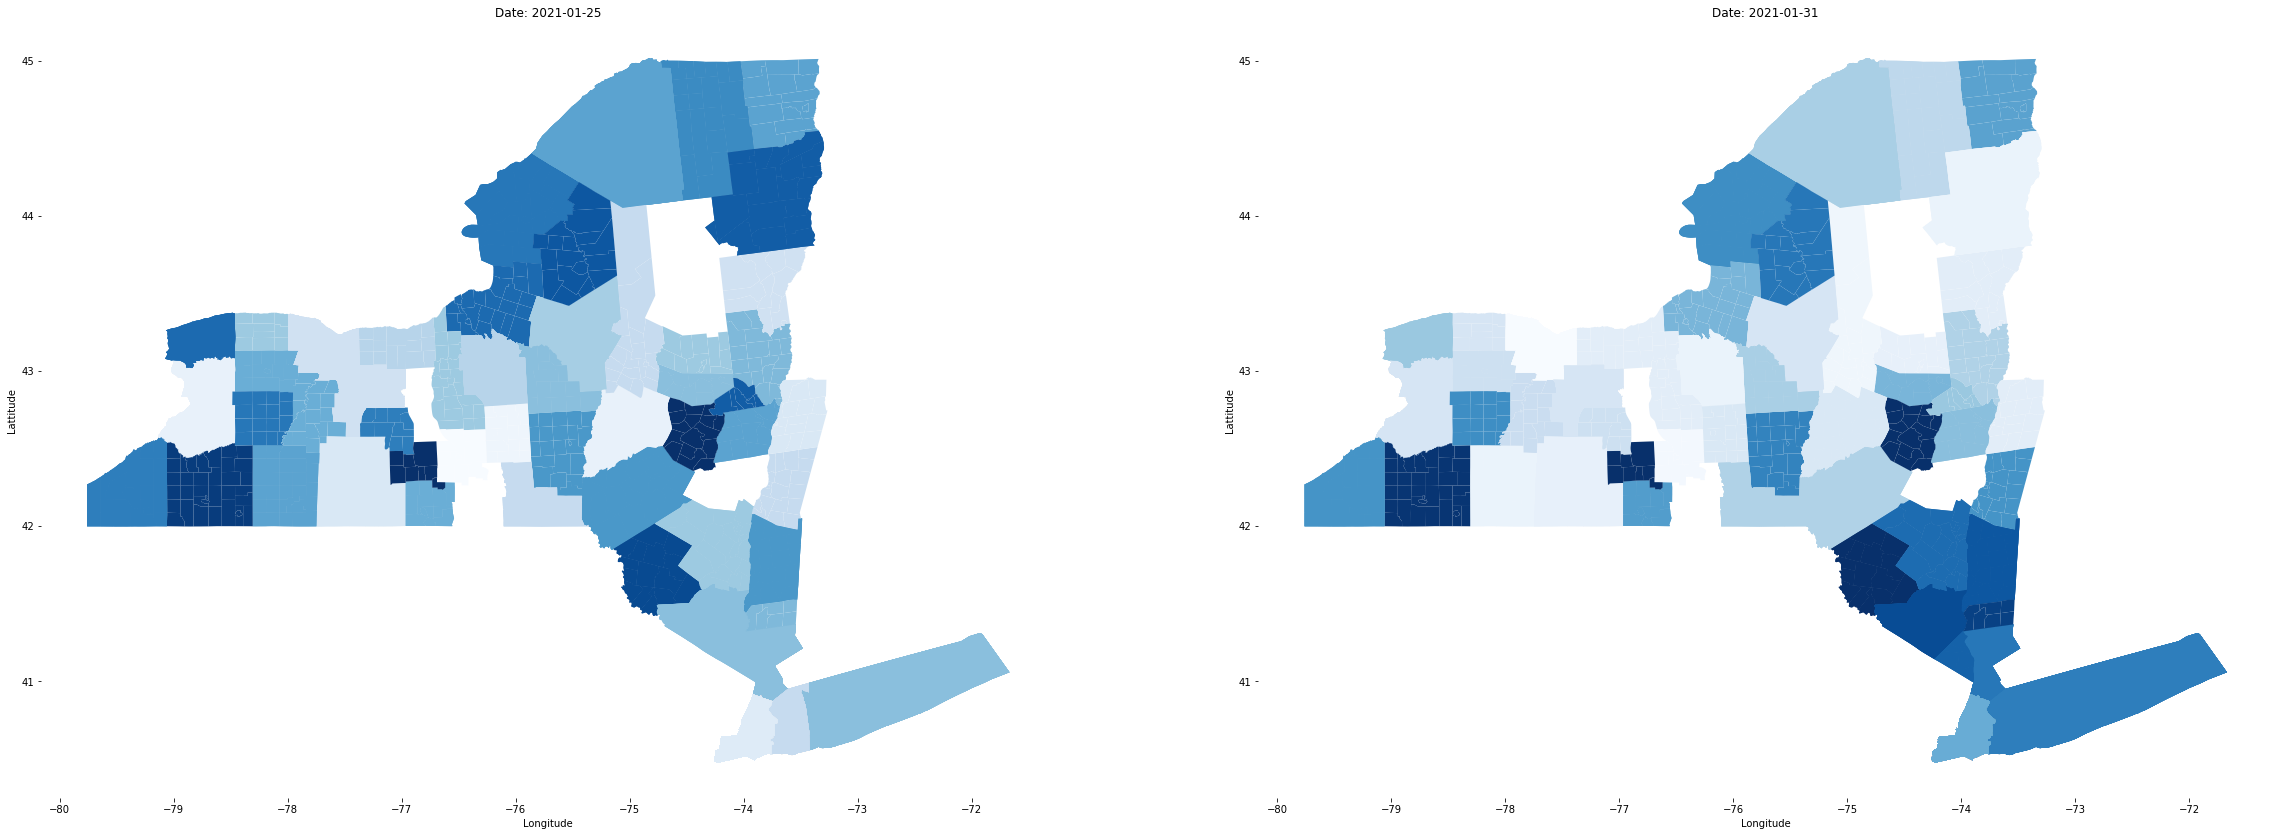

In [39]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-01-25',ax1),('2021-01-31',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'grocery_and_pharmacy_percent_change_from_baseline', ax=ax, fig=fig, title="Date: "+date)

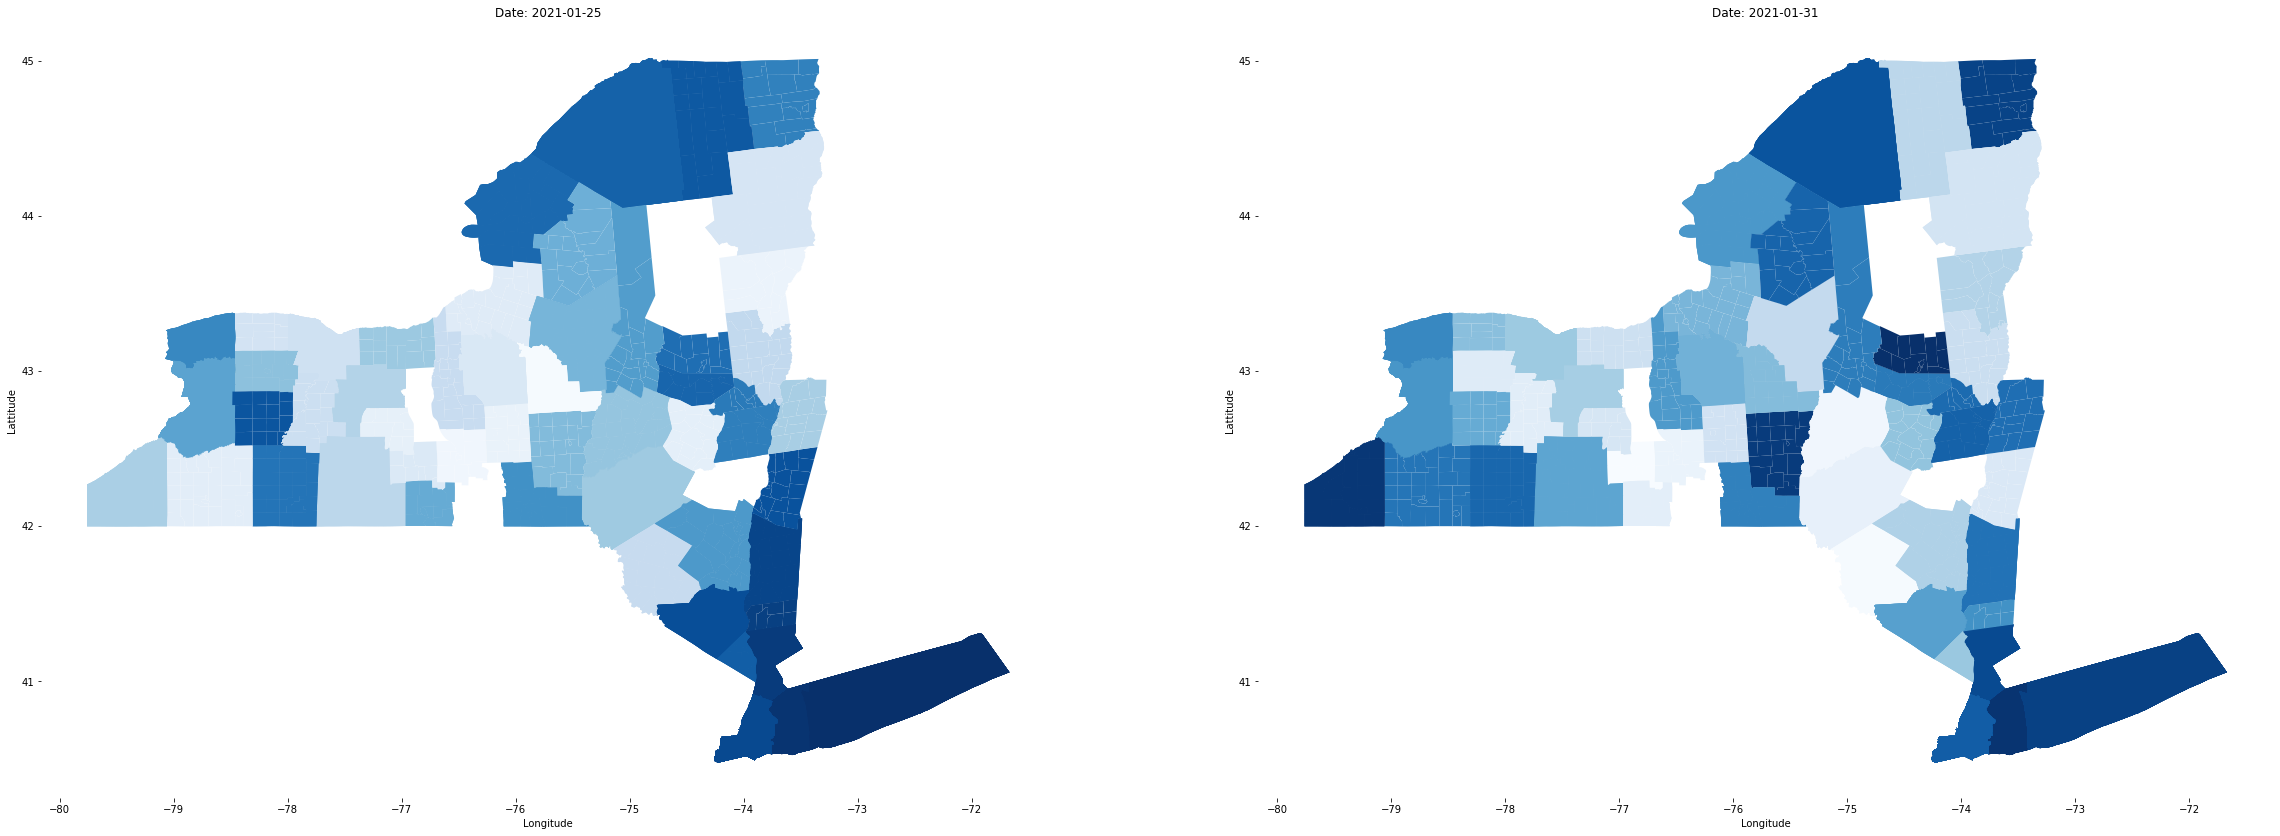

In [40]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)
for date,ax in [('2021-01-25',ax1),('2021-01-31',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'cases_by_pop', ax=ax, fig=fig, title="Date: "+date)

**9th July 2021 -  Spring/Summer**

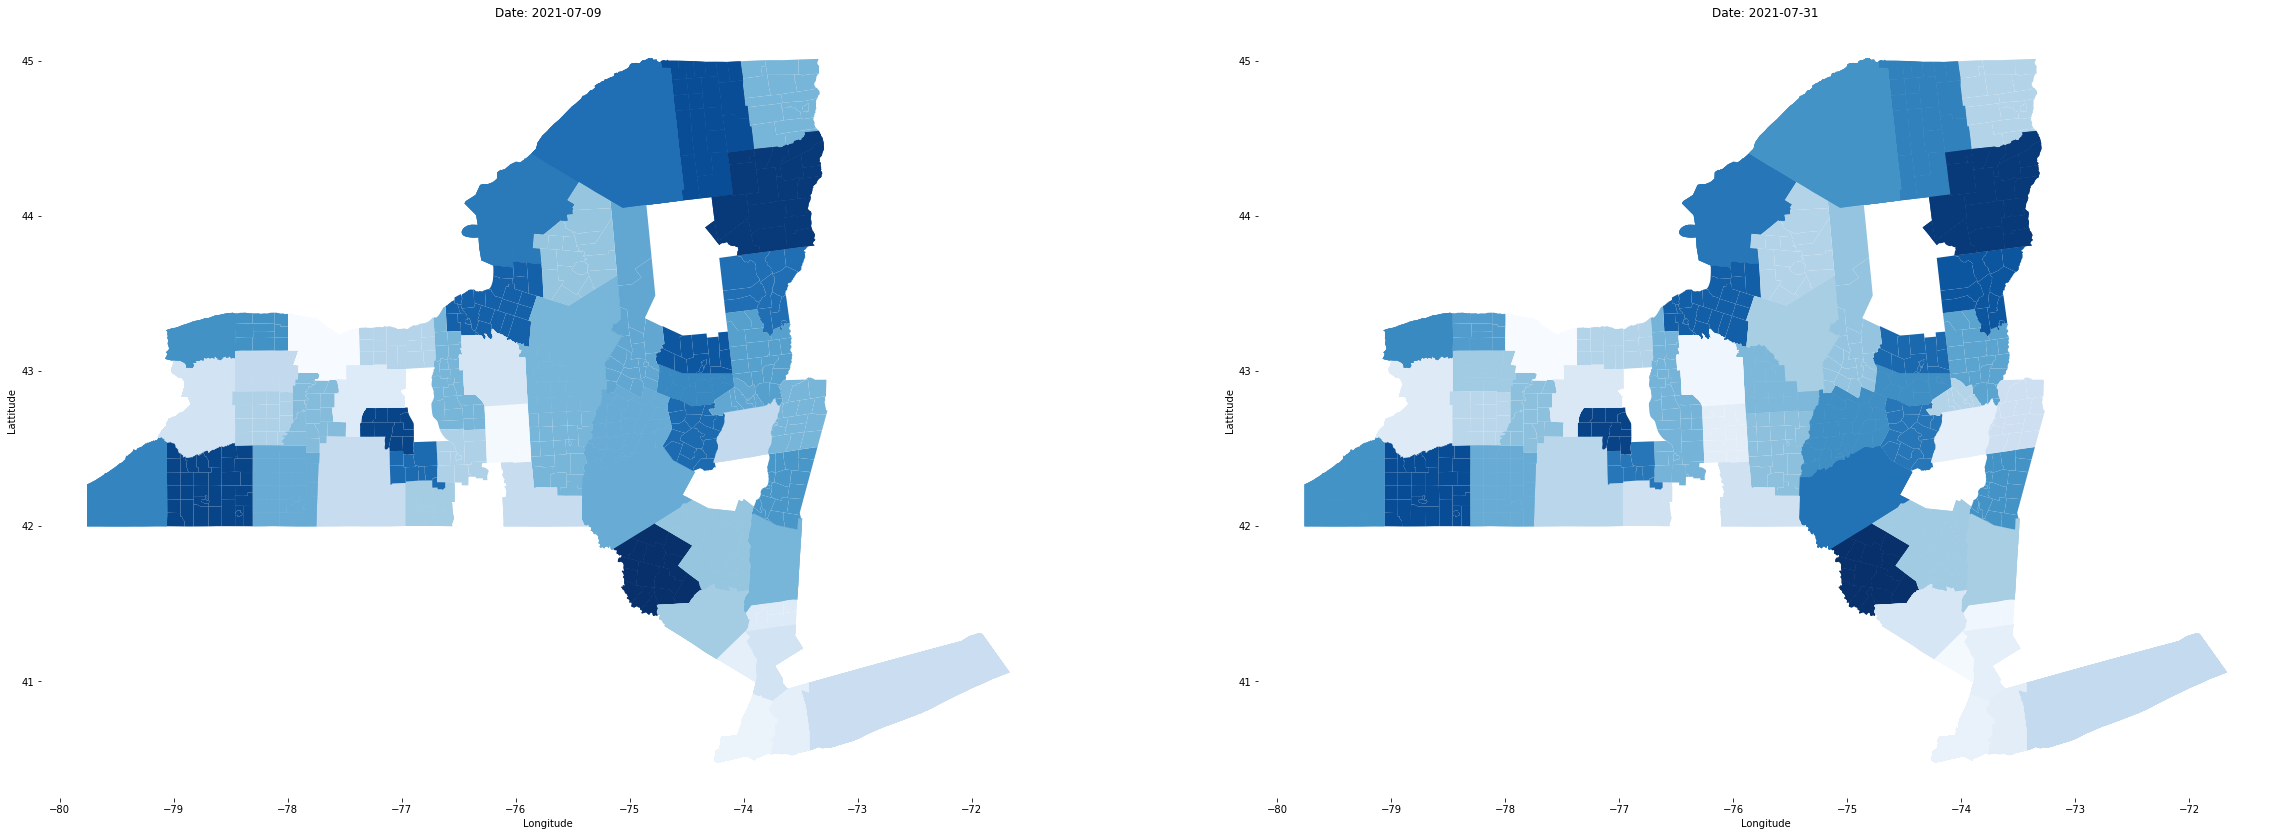

In [41]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-07-09',ax1),('2021-07-31',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'grocery_and_pharmacy_percent_change_from_baseline', ax=ax, fig=fig, title="Date: "+date)

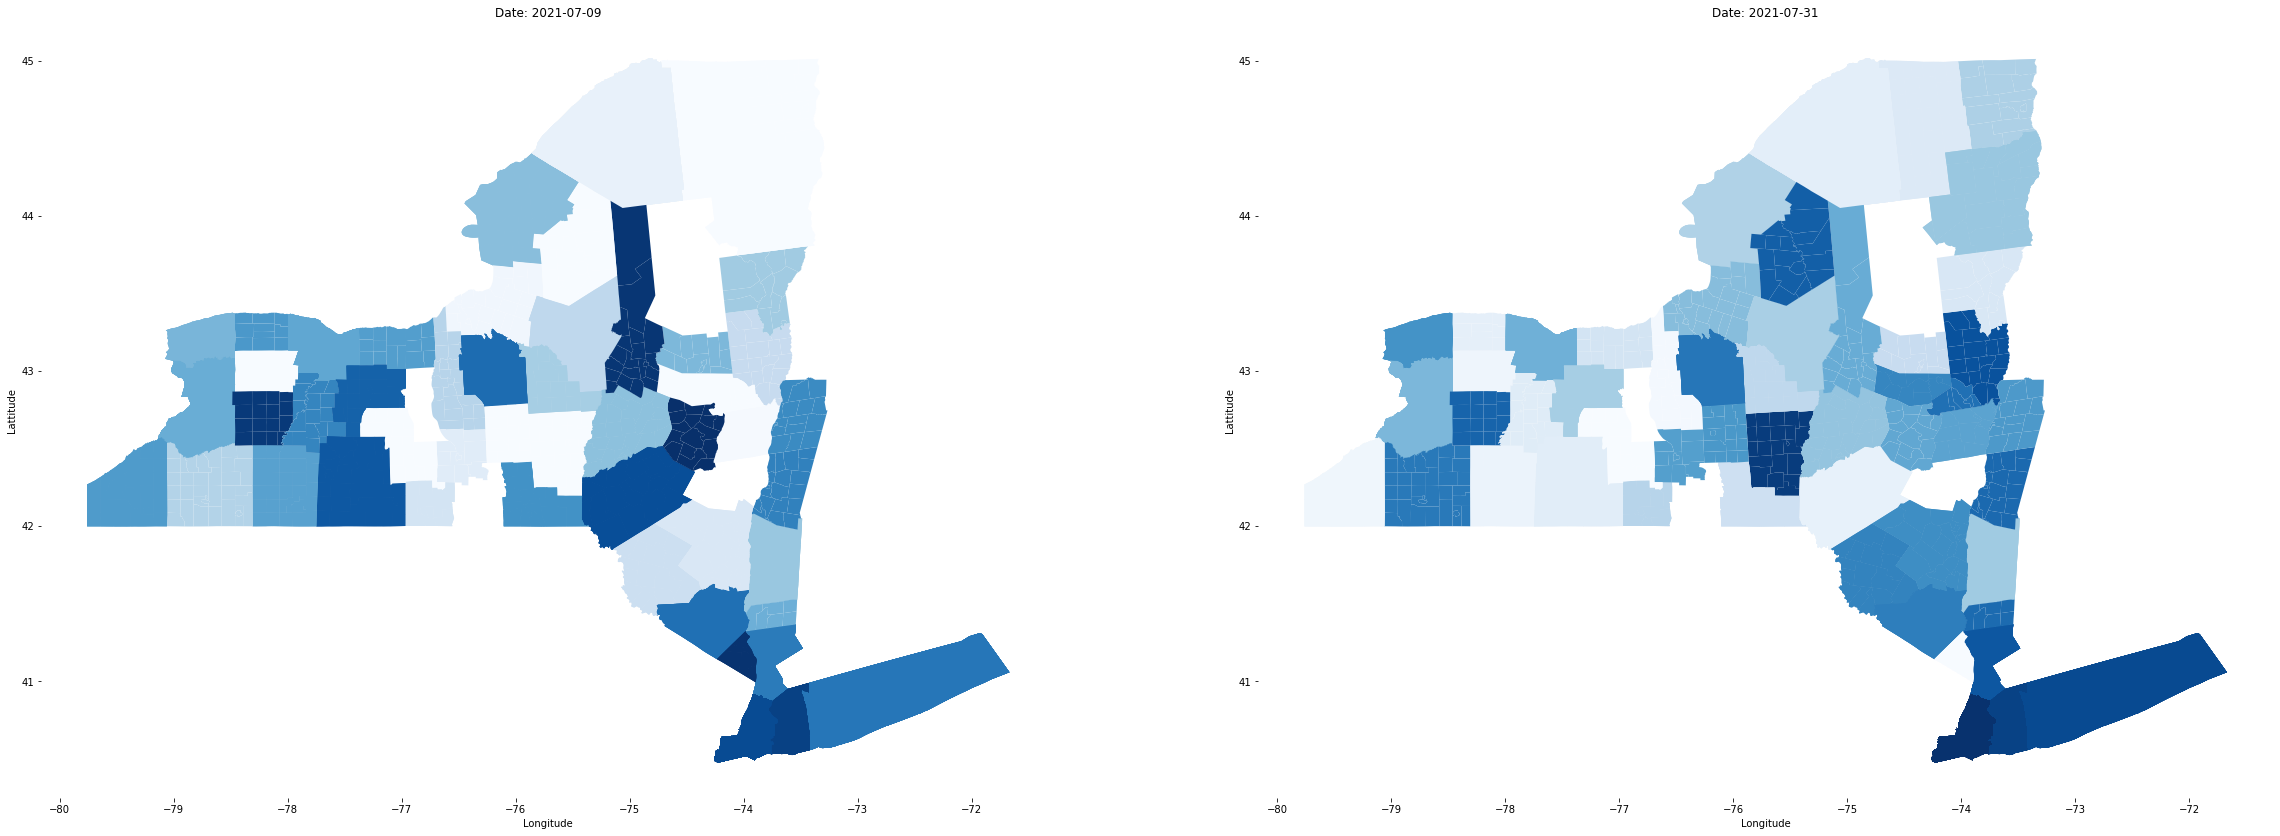

In [42]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)
for date,ax in [('2021-07-09',ax1),('2021-07-31',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'cases_by_pop', ax=ax, fig=fig, title="Date: "+date)

**23rd September 2021 - delta fourth wave**

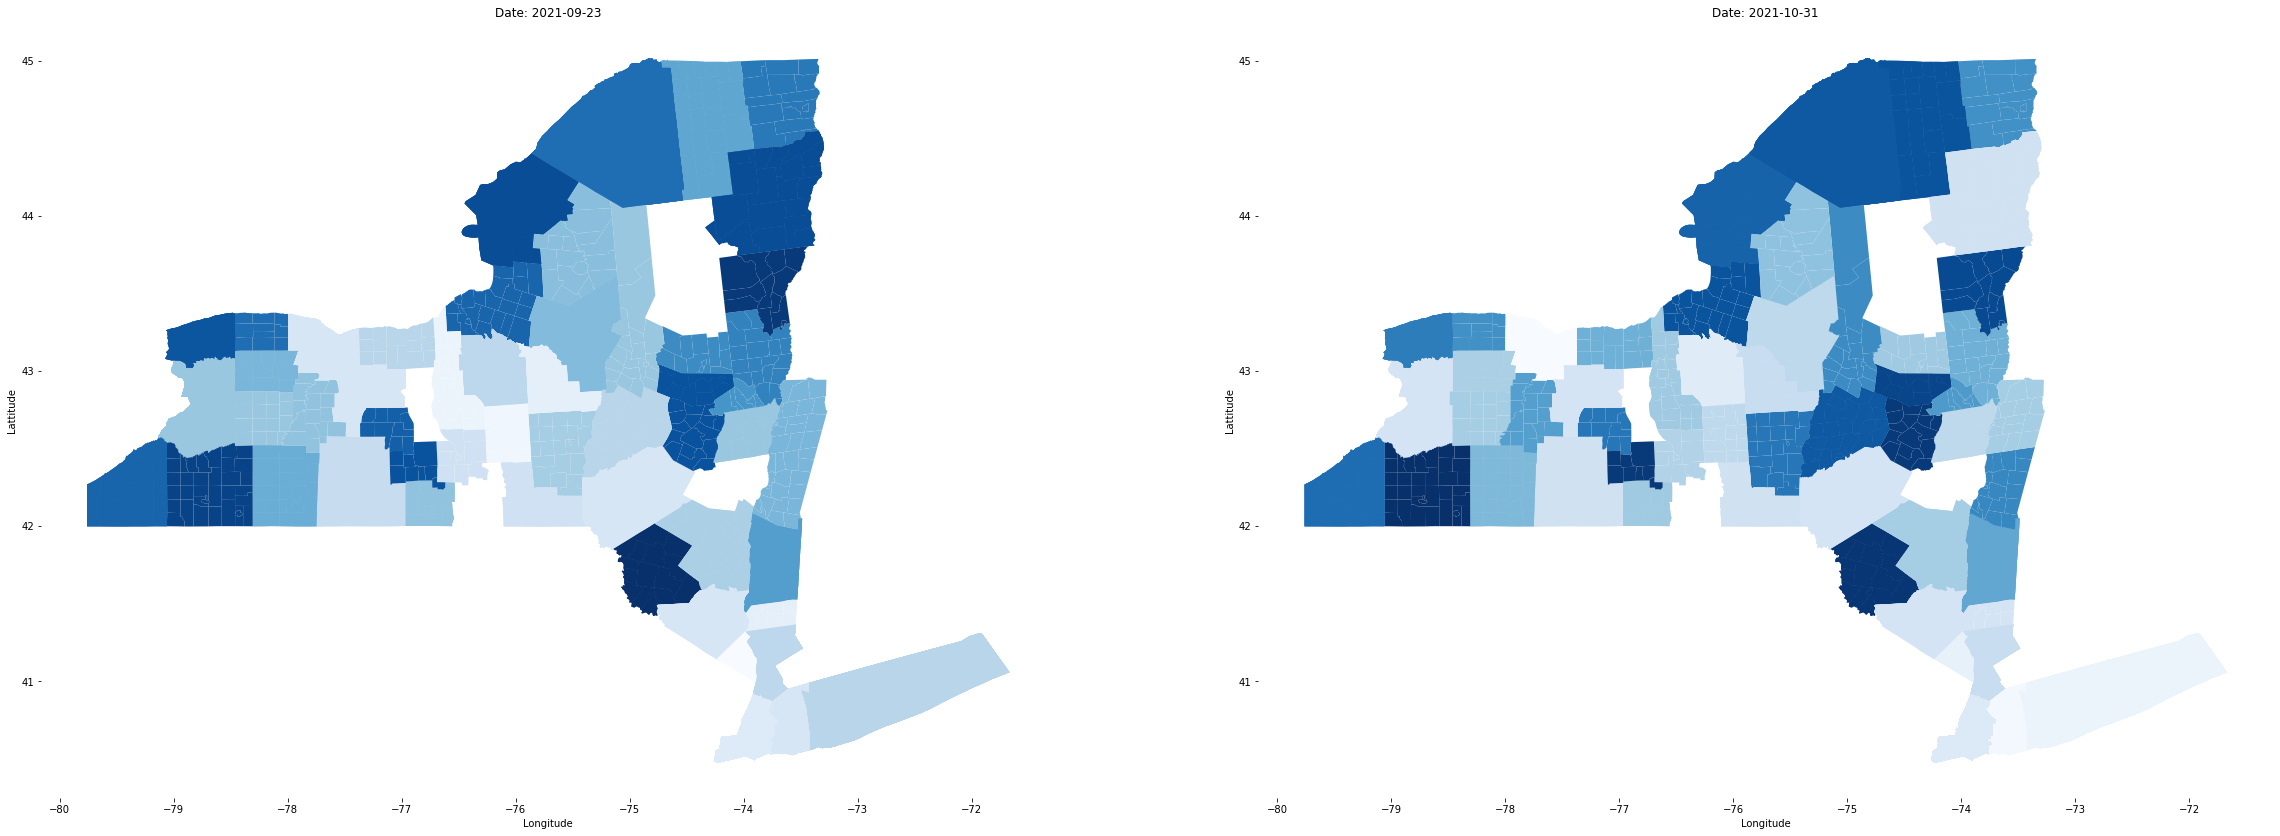

In [43]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2021-09-23',ax1),('2021-10-31',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'grocery_and_pharmacy_percent_change_from_baseline', ax=ax, fig=fig, title="Date: "+date)

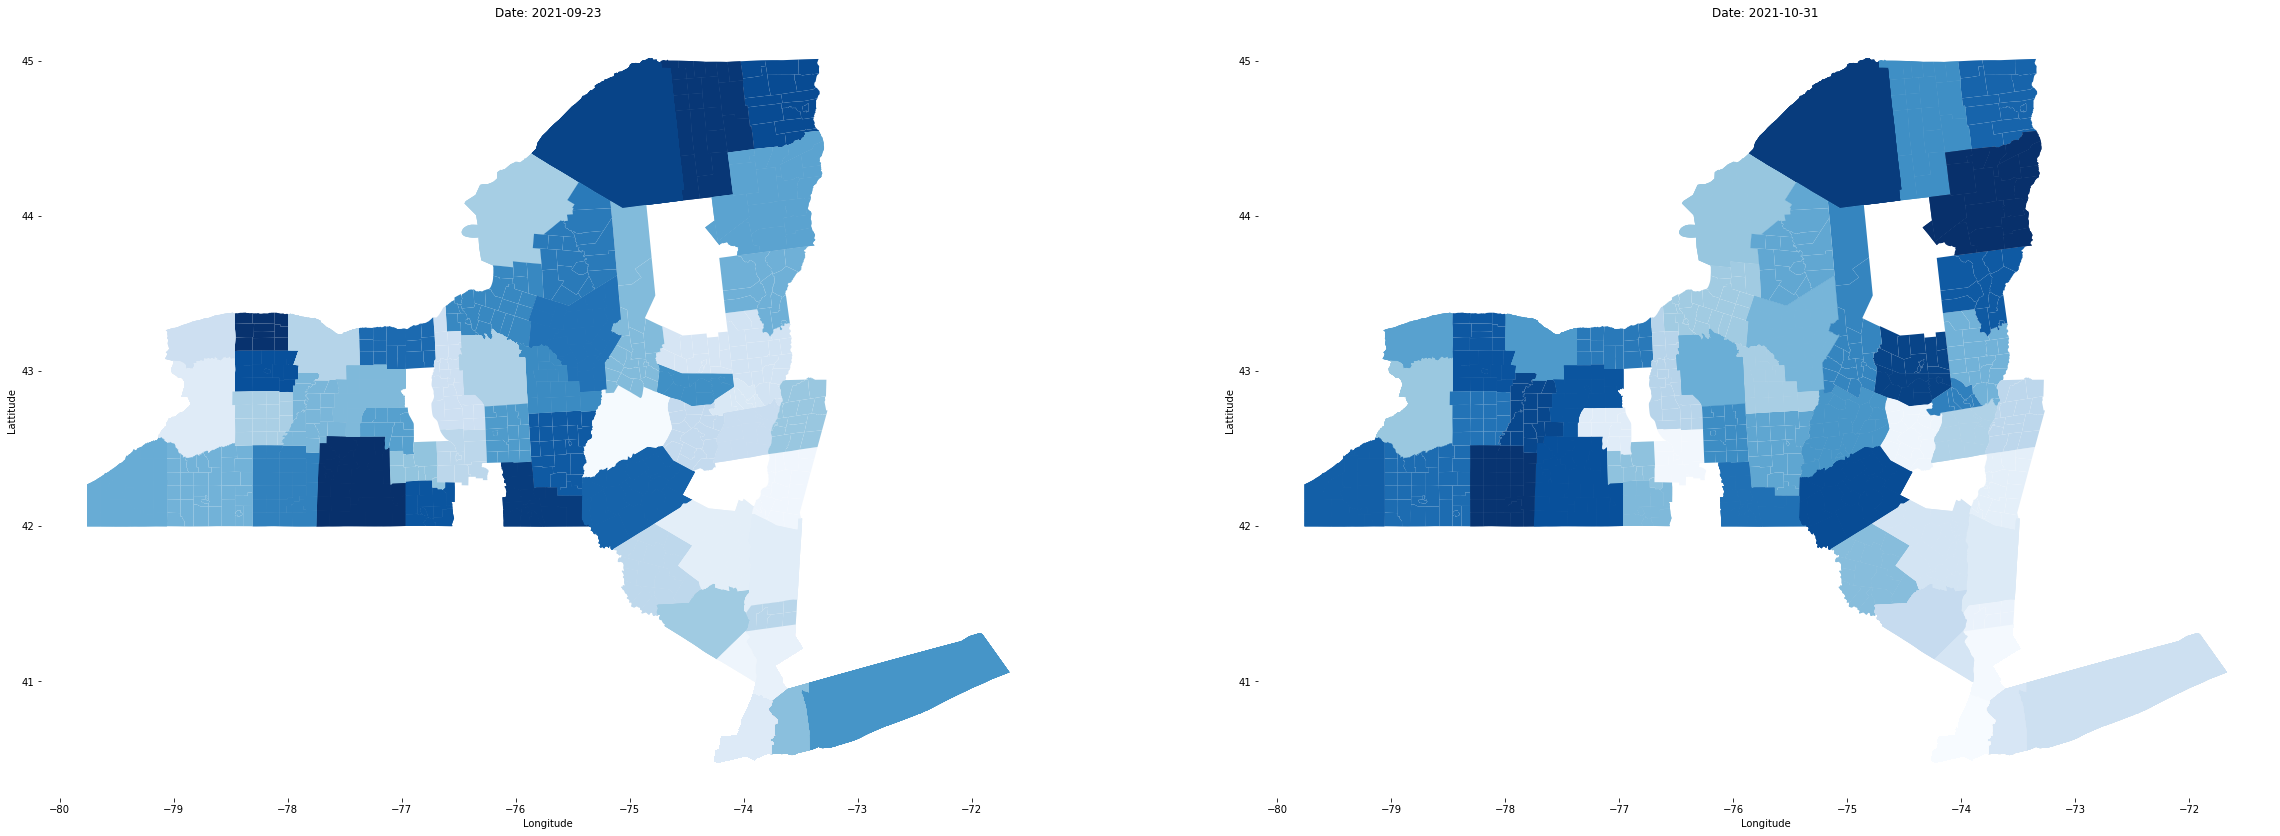

In [44]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)
for date,ax in [('2021-09-23',ax1),('2021-10-31',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'cases_by_pop', ax=ax, fig=fig, title="Date: "+date)

**4th February 2022 - omicron fifth wave**

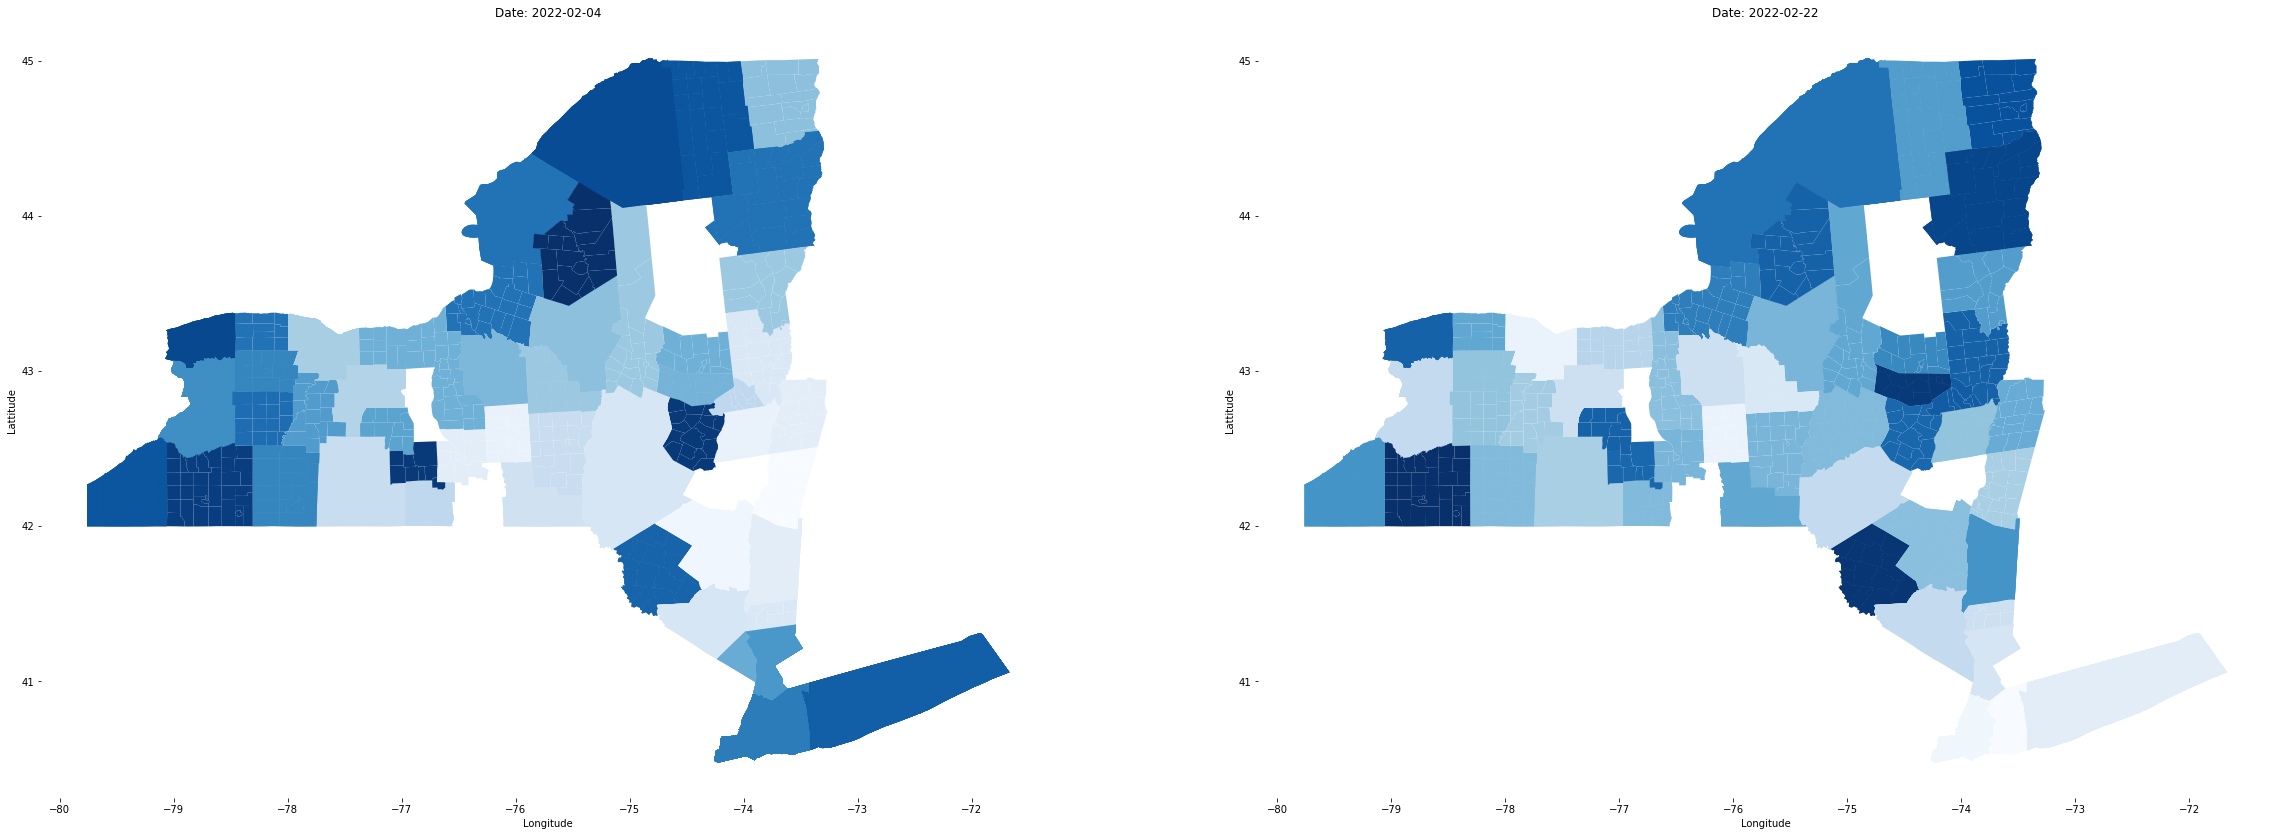

In [45]:
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)

for date,ax in [('2022-02-04',ax1),('2022-02-22',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'grocery_and_pharmacy_percent_change_from_baseline', ax=ax, fig=fig, title="Date: "+date)

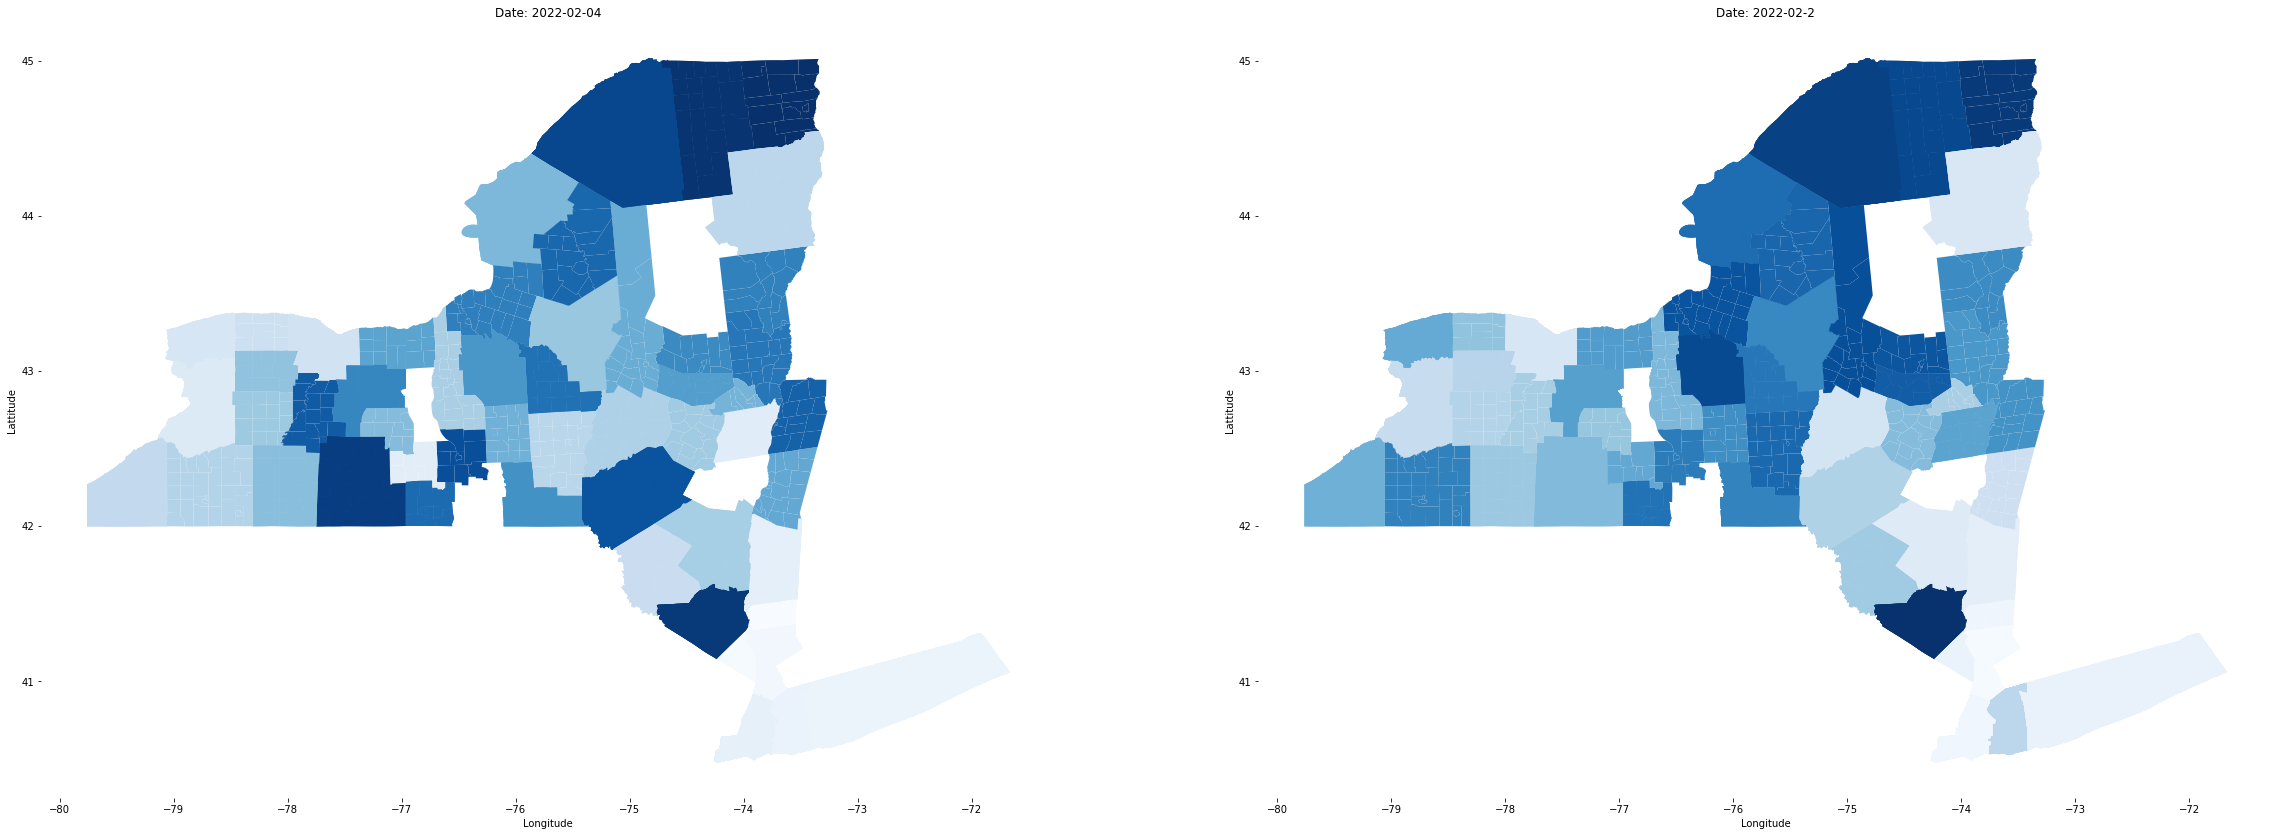

In [46]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1,ax2) = plt.subplots(figsize=(40,30), ncols=2,nrows=1)
for date,ax in [('2022-02-04',ax1),('2022-02-22',ax2)]:
    temp =  df[df.date == date]
    temp = street_map.merge(temp, on=['COUNTY'])
    plot_geo_data(temp, 'cases_by_pop', ax=ax, fig=fig, title="Date: "+date)